# Demonstration of the Utility of Local Differential Privacy
What follows is a set of tests simulating an N:1 client/server statistics collection process that is locally differentially private. The purpose of each feature is demonstrated by comparing runs with and without it to the "ground truth" (stored in each client).

In [1]:
import longitudinal
import test

# Above are the modules constructed for this project
# longitudinal contains the client and server, as well as some methods for vector manipulation specific to this domain
# test contains an instance which encapsulates the entire environment, including running and stats, and some test suites

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transform a matrix into a matrix-wide min/max normalized version
def normalize_matrix(Y):
    ymin = np.min(Y)
    ymax = np.max(Y)
    return np.array([test.rescale(Y[i], ymin, ymax) for i in range(rep)])

In [3]:
# Make an instance to test with
rep = 32
n = 1024*128
d = 32
k = 4
eps = 0.1
instance = test.Instance(n, d, k, eps)
x = np.arange(0, d, dtype=int)
y_true = instance.f_true
y_norm_true = test.rescale(y_true, np.min(y_true), np.max(y_true))

In [4]:
# Do an "honest" run (epsilon = 100)
old = instance.epsilon
instance.epsilson = 100
Y_honest = np.array([instance.run(True, False) for i in range(rep)])
instance.epsilson = old
Y_norm_honest = normalize_matrix(Y_honest)

In [5]:
# Do a "noiseless" run (report "0" rather than noise)
old = instance.hide_zero = False
Y_noiseless = np.array([instance.run(True, False) for i in range(rep)])
instance.hide_zero = old
Y_norm_noiseless = normalize_matrix(Y_noiseless)

In [6]:
# Do a "leaf" run (report from leaf always rather than higher in the tree)
old = instance.choose_level = False
Y_leaf = np.array([instance.run(True, False) for i in range(rep)])
instance.choose_level = old
Y_norm_leaf = normalize_matrix(Y_leaf)

In [7]:
# Make a matrix with all the results in it (actual run)
Y = np.array([instance.run(True, False) for i in range(rep)])
Y_norm = normalize_matrix(Y)

In [8]:
# Multipurpose plotting method
def do_instance_plot(title, x, plots, xlabel, ylabel):
    plt.figure(dpi=250)
    for plot in plots:
        Y = plot[0]
        label = plot[1]
        if len(Y.shape) == 1:
            plt.plot(x, Y, label=label)
        else:
            plt.errorbar(x, np.mean(Y, axis=0), yerr=(np.std(Y, axis=0)), label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(0, len(x) + 1, int(len(x) / 8)))
    plt.title(title)
    plt.legend()
    plt.show()

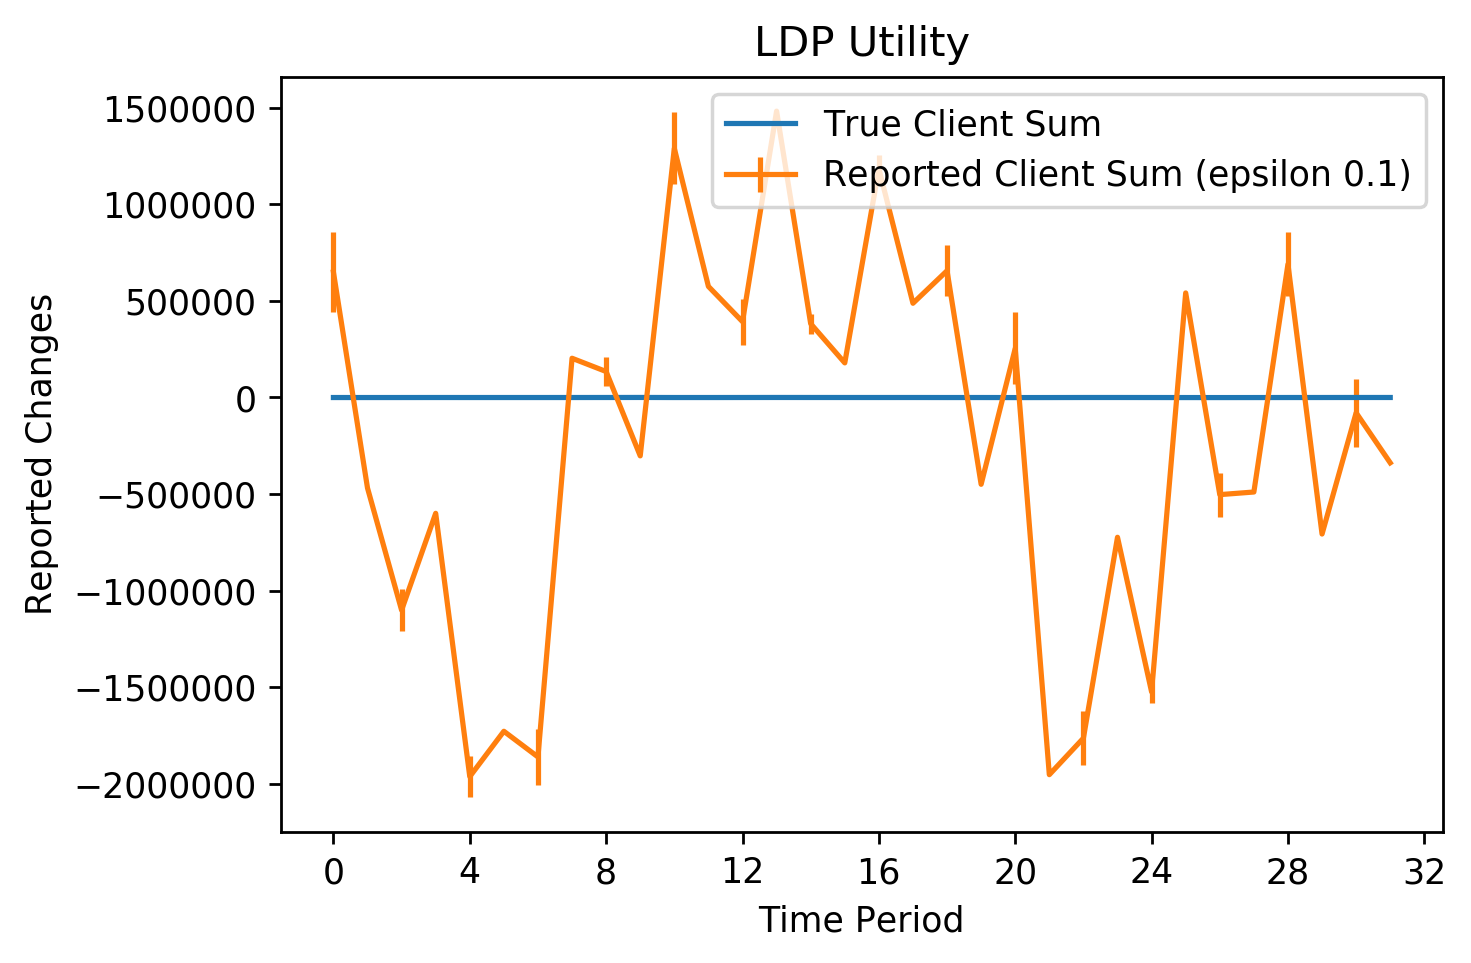

In [9]:
# Plot reported vs. actual values
plots = []
plots.append([y_true, 'True Client Sum'])
plots.append([Y, 'Reported Client Sum (epsilon 0.1)'])
do_instance_plot('LDP Utility', x, plots, 'Time Period', 'Reported Changes')

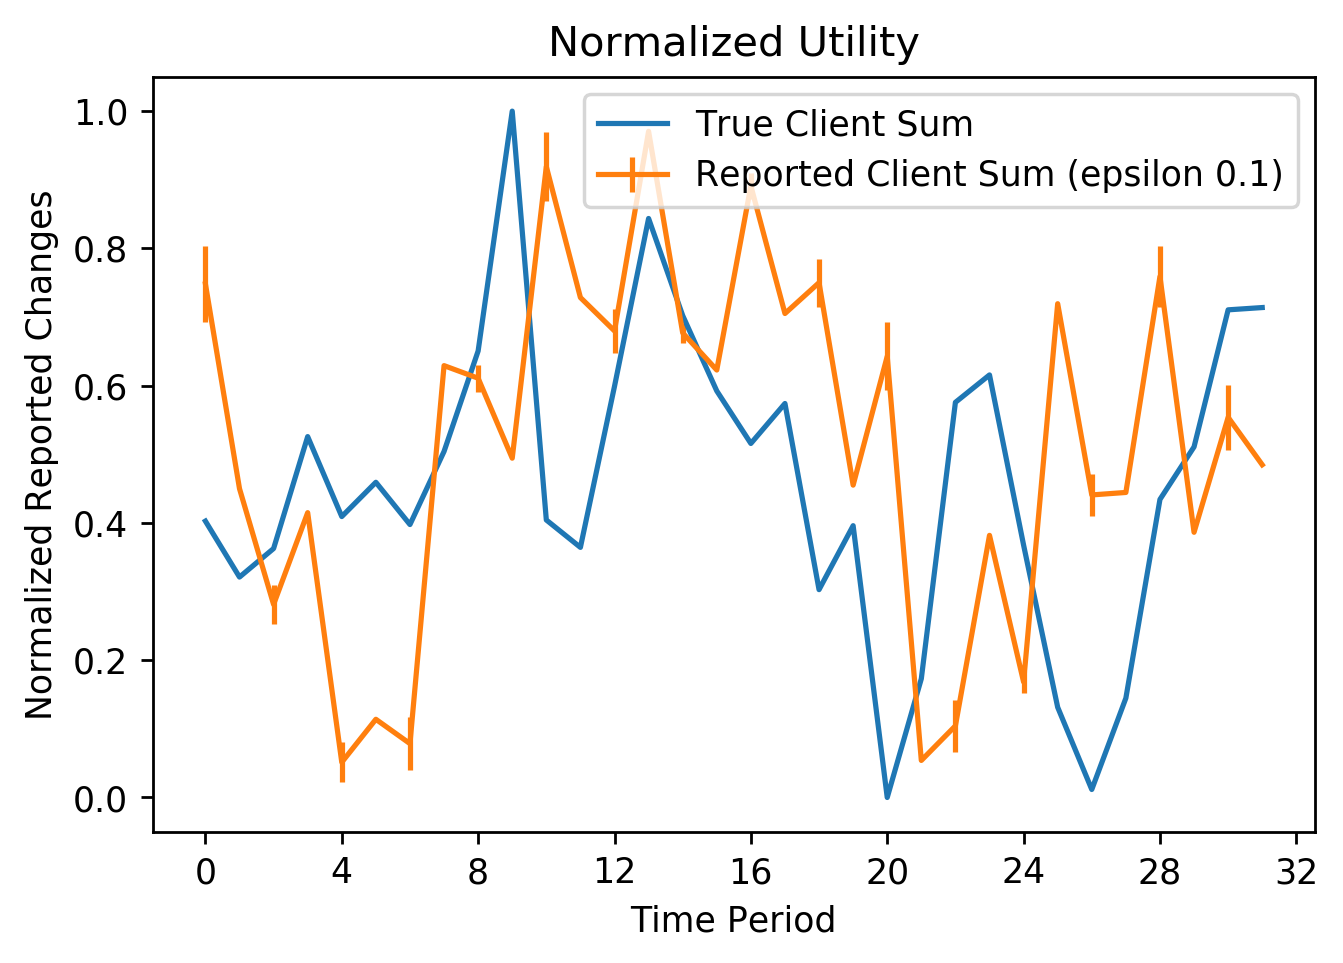

In [10]:
# Plot normalized reported vs. actual values
plots = []
plots.append([y_norm_true, 'True Client Sum'])
plots.append([Y_norm, 'Reported Client Sum (epsilon 0.1)'])
do_instance_plot('Normalized Utility', x, plots, 'Time Period', 'Normalized Reported Changes')

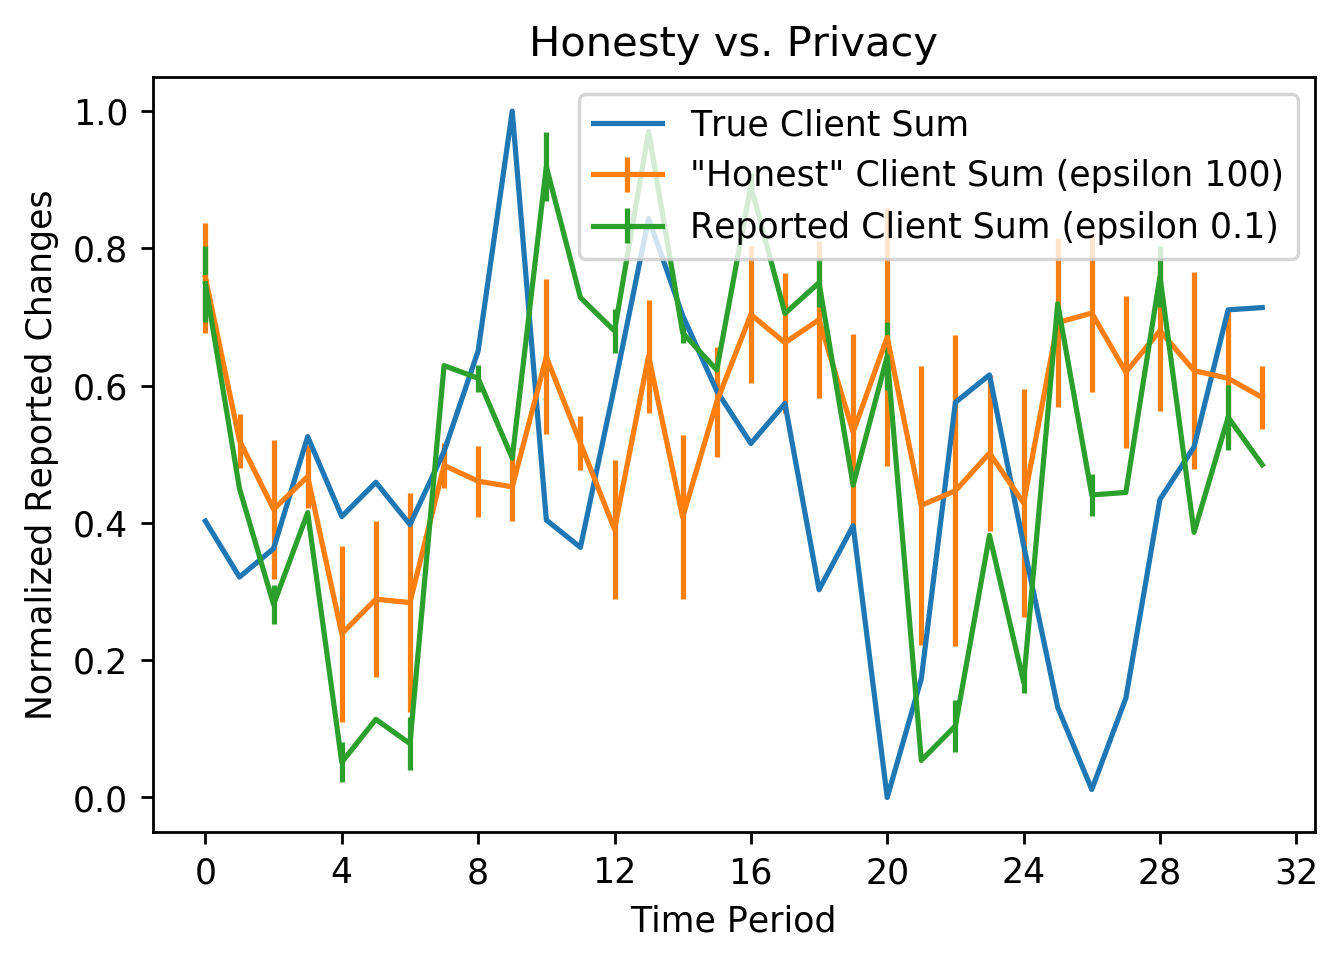

In [16]:
# Plot honest vs. randomized values
plots = []
plots.append([y_norm_true, 'True Client Sum'])
plots.append([Y_norm_honest, '"Honest" Client Sum (epsilon 100)'])
plots.append([Y_norm, 'Reported Client Sum (epsilon 0.1)'])
do_instance_plot('Honesty vs. Privacy', x, plots, 'Time Period', 'Normalized Reported Changes')

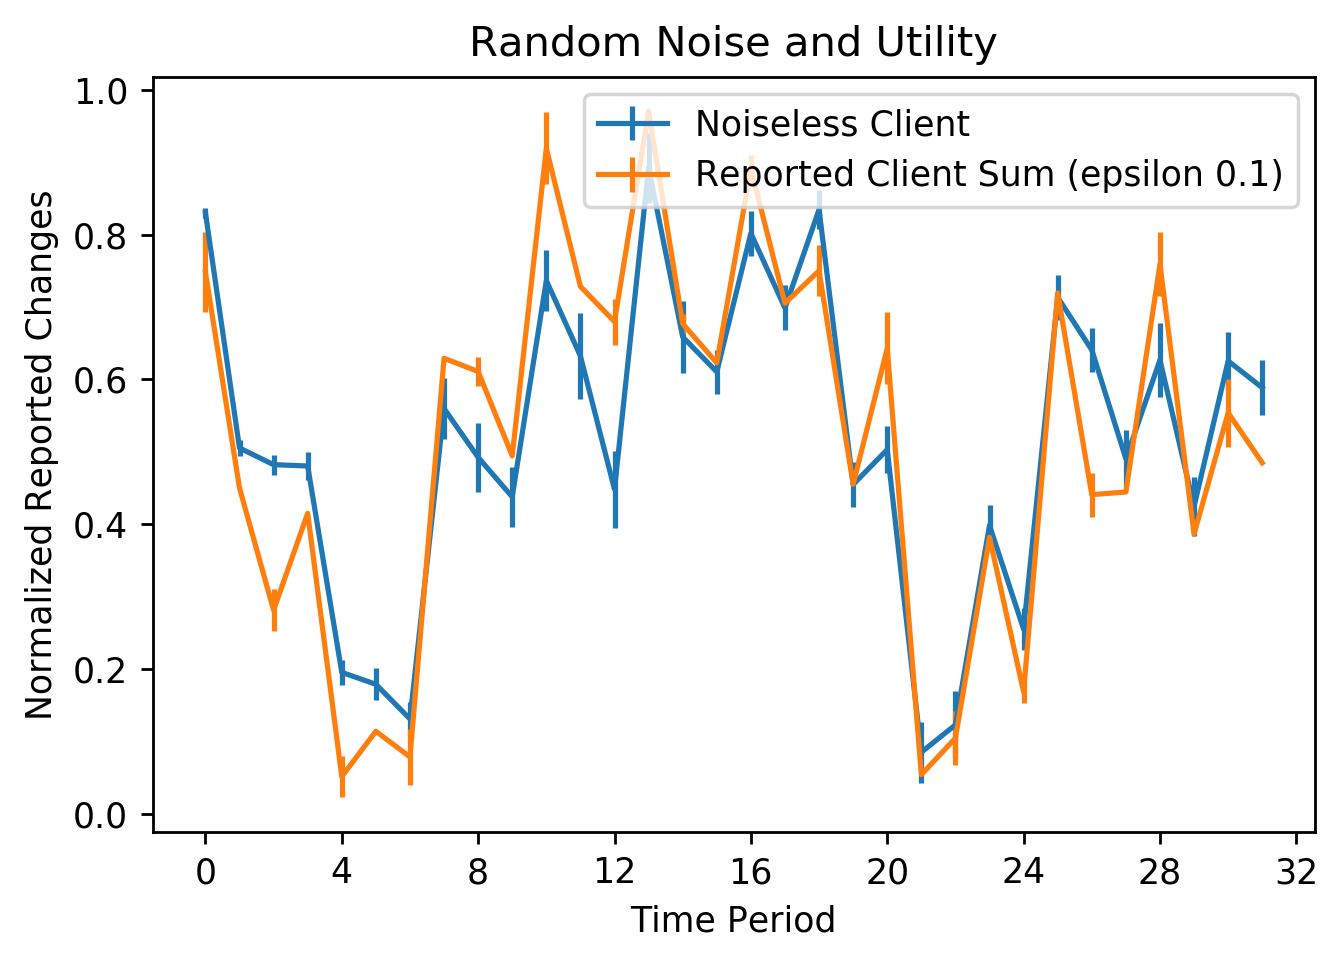

In [12]:
# Plot noiseless vs. noisy
plots = []
plots.append([Y_norm_noiseless, 'Noiseless Client'])
plots.append([Y_norm, 'Reported Client Sum (epsilon 0.1)'])
do_instance_plot('Random Noise and Utility', x, plots, 'Time Period', 'Normalized Reported Changes')

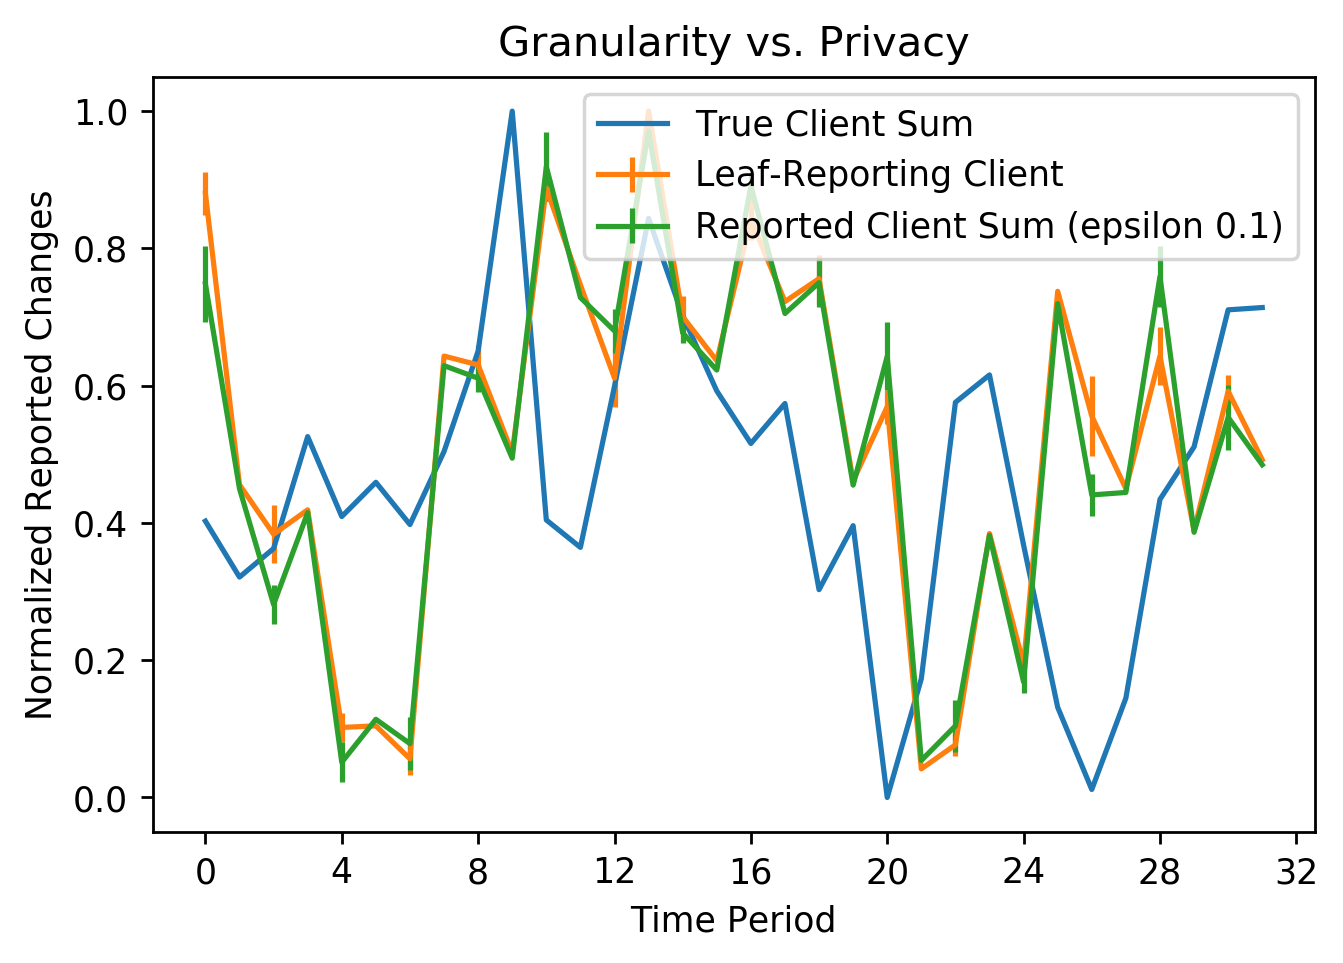

In [13]:
# Plot granularity settings
plots = []
plots.append([y_norm_true, 'True Client Sum'])
plots.append([Y_norm_leaf, 'Leaf-Reporting Client'])
plots.append([Y_norm, 'Reported Client Sum (epsilon 0.1)'])
do_instance_plot('Granularity vs. Privacy', x, plots, 'Time Period', 'Normalized Reported Changes')

In [14]:
# Add runs at various epsilon values
old = instance.epsilon
instance.epsilson = 0.2
Y_2 = np.array([instance.run(True, False) for i in range(rep)])
Y_norm_2 = normalize_matrix(Y_2)
instance.epsilson = 0.3
Y_3 = np.array([instance.run(True, False) for i in range(rep)])
Y_norm_3 = normalize_matrix(Y_3)
instance.epsilson = 0.4
Y_4 = np.array([instance.run(True, False) for i in range(rep)])
Y_norm_4 = normalize_matrix(Y_4)
instance.epsilson = 0.5
Y_5 = np.array([instance.run(True, False) for i in range(rep)])
Y_norm_5 = normalize_matrix(Y_5)
instance.epsilson = old

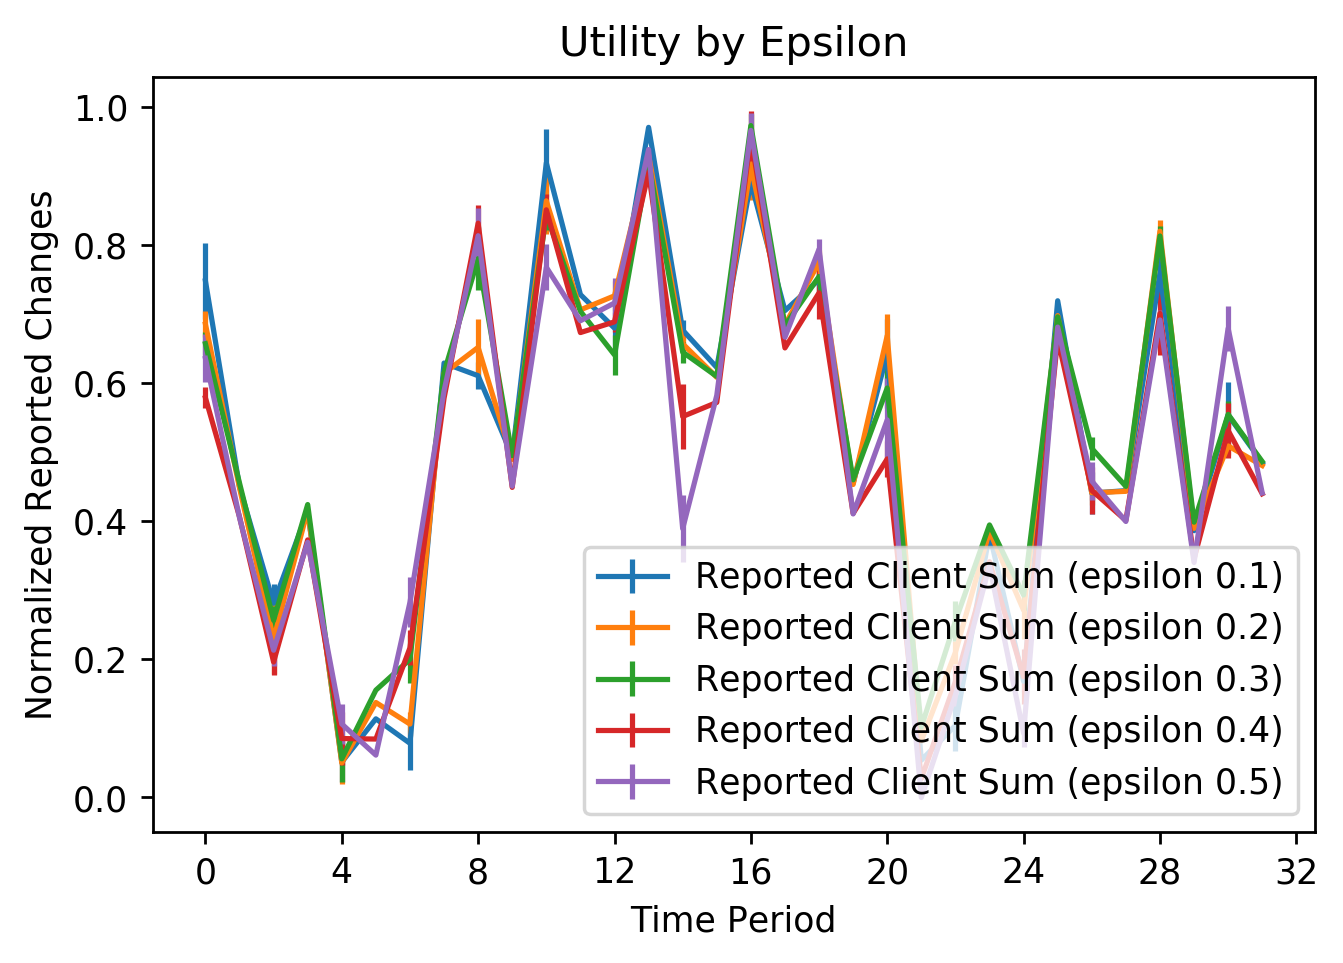

In [15]:
# Plot reports at different epsilon values
plots = []
#plots.append([y_norm_true, 'True Client Sum'])
plots.append([Y_norm, 'Reported Client Sum (epsilon 0.1)'])
plots.append([Y_norm_2, 'Reported Client Sum (epsilon 0.2)'])
plots.append([Y_norm_3, 'Reported Client Sum (epsilon 0.3)'])
plots.append([Y_norm_4, 'Reported Client Sum (epsilon 0.4)'])
plots.append([Y_norm_5, 'Reported Client Sum (epsilon 0.5)'])
do_instance_plot('Utility by Epsilon', x, plots, 'Time Period', 'Normalized Reported Changes')